In [11]:
import pandas as pd
import torch
import numpy as np

def denormalize_predictions(predictions_file, scalers_file):
    """
    Denormalizes predictions using saved scalers
    
    Args:
        predictions_file: Path to predictions CSV file
        scalers_file: Path to PyTorch scalers file
    
    Returns:
        Dataframe with denormalized predictions
    """
    # Load predictions
    predictions_df = pd.read_csv(predictions_file)
    print(f"Loaded predictions from {predictions_file}: {len(predictions_df)} rows")
    
    try:
        # Load scalers
        scalers = torch.load(scalers_file)
        print(f"Loaded scalers from {scalers_file}")
        
        # Find ball position scaler
        ball_pos_scaler = None
        for item in scalers:
            if isinstance(item, tuple) and item[0] == 'ball_pos':
                ball_pos_scaler = item[1]
                print("Found ball position scaler")
                break
        
        if ball_pos_scaler:
            # Extract predictions as numpy array
            predictions_array = predictions_df[['ball_x_Home', 'ball_y_Home']].values
            
            # Apply inverse transform
            denormalized_coords = ball_pos_scaler.inverse_transform(predictions_array)
            
            # Create output dataframe
            denorm_df = predictions_df.copy()
            denorm_df['ball_x_Home'] = denormalized_coords[:, 0]
            denorm_df['ball_y_Home'] = denormalized_coords[:, 1]
            
            # Save denormalized predictions
            output_file = predictions_file.replace('.csv', '_denormalized_simple_80_seq.csv')
            denorm_df.to_csv(output_file, index=False)
            print(f"Saved denormalized predictions to {output_file}")
            
            return denorm_df
        else:
            print("Error: No ball position scaler found in the scalers file")
            return None
    except Exception as e:
        print(f"Error during denormalization: {str(e)}")
        return None

if __name__ == "__main__":
    # Specify your files
    predictions_file = 'match5_ball_predictions_simple.csv'
    scalers_file = 'combined_scalers_simple.pt'
    
    # Denormalize predictions
    denorm_df = denormalize_predictions(predictions_file, scalers_file)
    
    if denorm_df is not None:
        # Print sample of denormalized data
        print("\nSample of denormalized predictions:")
        print(denorm_df.head())

Loaded predictions from match5_ball_predictions_simple.csv: 10921 rows
Loaded scalers from combined_scalers_simple.pt
Found ball position scaler
Saved denormalized predictions to match5_ball_predictions_simple_denormalized_simple_80_seq.csv

Sample of denormalized predictions:
   ball_x_Home  ball_y_Home  Time  IdPeriod
0    28.067165    -5.457472     0         9
1    28.128581    -5.464986    10         9
2    28.125118    -5.470035    20         9
3    28.163580    -5.473003    30         9
4    28.123463    -5.477393    40         9


/tmp/ipykernel_4804/4219943046.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  scalers = torch.load(scalers_file)


In [3]:
denorm_df[5000:5020]

,ball_x_Home,ball_y_Home,Time,IdPeriod
5000,9.028512,-0.290923,50000,9
5001,9.072197,-0.287772,50010,9
5002,9.145297,-0.249049,50020,9
5003,9.084500,-0.201251,50030,9
5004,9.119008,-0.138670,50040,9
5005,9.176626,-0.139182,50050,9
5006,9.200561,-0.122459,50060,9
5007,9.175255,-0.072211,50070,9
5008,9.207437,-0.100944,50080,9
5009,9.186008,-0.052958,50090,9


In [5]:
denorm_df[5000:5020]

,ball_x_Home,ball_y_Home,Time,IdPeriod
5000,51.386028,6.445653,50000,9
5001,51.385898,6.450406,50010,9
5002,51.315288,6.456128,50020,9
5003,51.344317,6.461151,50030,9
5004,51.343068,6.465055,50040,9
5005,51.352534,6.469660,50050,9
5006,51.297511,6.478129,50060,9
5007,51.307027,6.487351,50070,9
5008,51.297382,6.490085,50080,9
5009,51.267784,6.491552,50090,9


In [13]:
denorm_df[7100:7120]

,ball_x_Home,ball_y_Home,Time,IdPeriod
7100,4.273191,-5.556448,71000,9
7101,3.919841,-5.547709,71010,9
7102,3.604280,-5.544875,71020,9
7103,3.168318,-5.541724,71030,9
7104,2.803748,-5.543004,71040,9
7105,2.464977,-5.540923,71050,9
7106,2.023171,-5.545737,71060,9
7107,1.694894,-5.548611,71070,9
7108,1.288863,-5.546565,71080,9
7109,0.901289,-5.544444,71090,9


In [4]:
def denormalize_predictions(predictions_file, scalers_file):
    """
    Denormalizes predictions using saved scalers
    
    Args:
        predictions_file: Path to predictions CSV file
        scalers_file: Path to PyTorch scalers file
    
    Returns:
        Dataframe with denormalized predictions
    """
    # Load predictions
    predictions_df = pd.read_csv(predictions_file)
    print(f"Loaded predictions from {predictions_file}: {len(predictions_df)} rows")
    
    try:
        # Load scalers
        scalers = torch.load(scalers_file)
        print(f"Loaded scalers from {scalers_file}")
        
        # Find ball position scaler
        ball_pos_scaler = None
        for item in scalers:
            if isinstance(item, tuple) and item[0] == 'ball_pos':
                ball_pos_scaler = item[1]
                print("Found ball position scaler")
                break
        
        if ball_pos_scaler:
            # Extract predictions as numpy array
            predictions_array = predictions_df[['ball_x_Home', 'ball_y_Home']].values
            
            # Apply inverse transform
            denormalized_coords = ball_pos_scaler.inverse_transform(predictions_array)
            
            # Create output dataframe
            denorm_df = predictions_df.copy()
            denorm_df['ball_x_Home'] = denormalized_coords[:, 0]
            denorm_df['ball_y_Home'] = denormalized_coords[:, 1]
            
            # Save denormalized predictions
            output_file = predictions_file.replace('.csv', '_denormalized_full.csv')
            denorm_df.to_csv(output_file, index=False)
            print(f"Saved denormalized predictions to {output_file}")
            
            return denorm_df
        else:
            print("Error: No ball position scaler found in the scalers file")
            return None
    except Exception as e:
        print(f"Error during denormalization: {str(e)}")
        return None

if __name__ == "__main__":
    # Specify your files
    predictions_file = 'match5_ball_predictions_full.csv'
    scalers_file = 'combined_scalers_full.pt'
    
    # Denormalize predictions
    denorm_df = denormalize_predictions(predictions_file, scalers_file)
    
    if denorm_df is not None:
        # Print sample of denormalized data
        print("\nSample of denormalized predictions:")
        print(denorm_df.head())

Loaded predictions from match5_ball_predictions_full.csv: 10921 rows
Loaded scalers from combined_scalers_full.pt
Found ball position scaler
Saved denormalized predictions to match5_ball_predictions_full_denormalized_full.csv

Sample of denormalized predictions:
   ball_x_Home  ball_y_Home  Time  IdPeriod
0    48.863837    18.977243     0         9
1    48.921837    19.055847    10         9
2    48.954406    19.107603    20         9
3    48.964540    19.154244    30         9
4    48.853444    19.195794    40         9


/tmp/ipykernel_4804/1450177258.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  scalers = torch.load(scalers_file)


In [16]:
denorm_df[1450:1530]

,ball_x_Home,ball_y_Home,Time,IdPeriod
1450,20.016092,7.199739,14500,9
1451,19.936582,6.941281,14510,9
1452,19.865292,6.728117,14520,9
1453,19.775856,6.505057,14530,9
1454,19.674529,6.276463,14540,9
...,...,...,...,...
1525,42.506675,7.569194,15250,9
1526,42.775550,7.439400,15260,9
1527,43.008242,7.387859,15270,9
1528,43.235762,7.267773,15280,9


Loaded 10921 ball position predictions


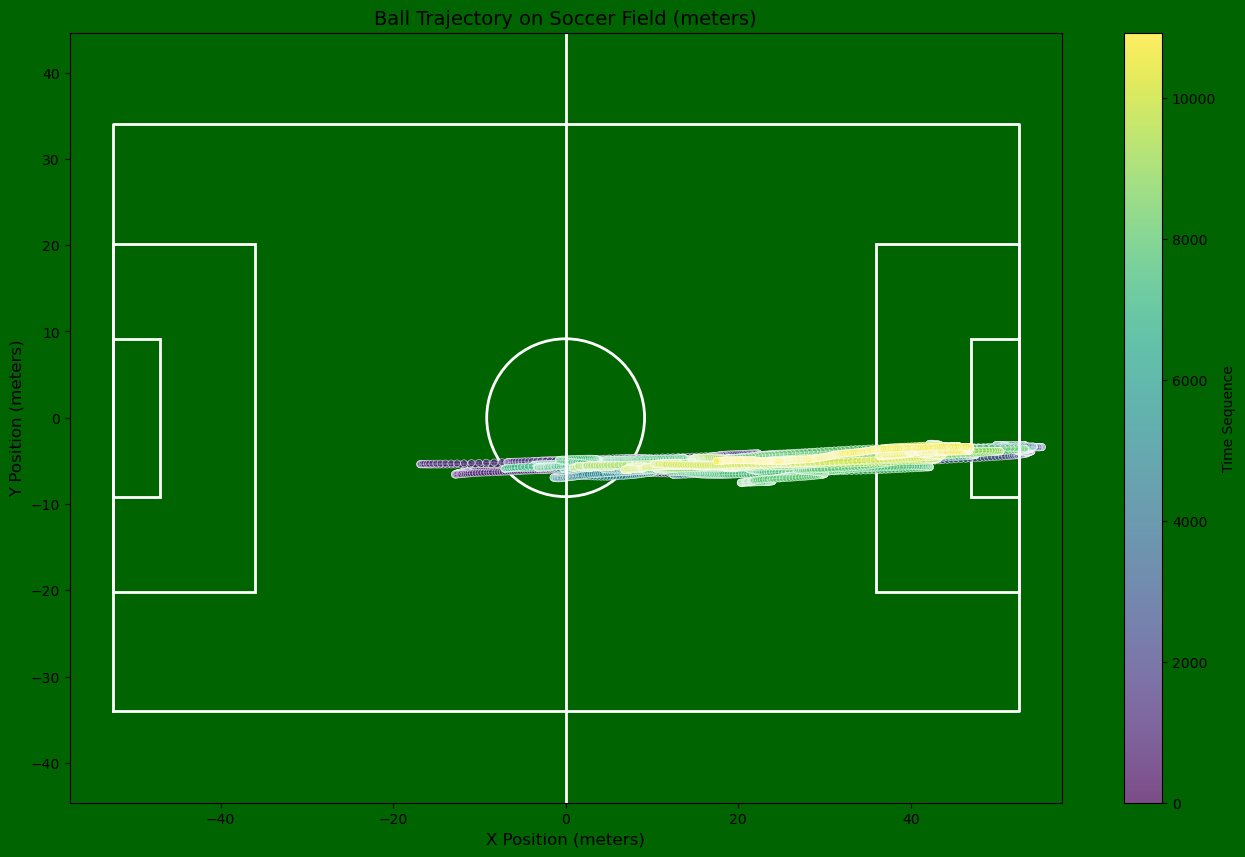

Plot saved as ball_trajectory_plot_simple_match5.png


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the denormalized predictions
df = pd.read_csv('match5_ball_predictions_simple_denormalized_simple_80_seq.csv')
print(f"Loaded {len(df)} ball position predictions")

# Soccer field dimensions in meters (standard: 105m x 68m)
field_length = 105
field_width = 68

# Create figure
plt.figure(figsize=(16, 10))

# Draw the soccer field
# Main field rectangle
plt.plot([-field_length/2, field_length/2, field_length/2, -field_length/2, -field_length/2],
         [-field_width/2, -field_width/2, field_width/2, field_width/2, -field_width/2], 'white', linewidth=2)

# Center line
plt.axvline(0, color='white', linewidth=2)

# Center circle
center_circle = plt.Circle((0, 0), 9.15, fill=False, color='white', linewidth=2)
plt.gca().add_patch(center_circle)

# Penalty areas
plt.gca().add_patch(patches.Rectangle((-field_length/2, -20.16), 16.5, 40.32, linewidth=2, 
                                      edgecolor='white', facecolor='none'))
plt.gca().add_patch(patches.Rectangle((field_length/2-16.5, -20.16), 16.5, 40.32, linewidth=2, 
                                      edgecolor='white', facecolor='none'))

# Goal areas
plt.gca().add_patch(patches.Rectangle((-field_length/2, -9.16), 5.5, 18.32, linewidth=2, 
                                      edgecolor='white', facecolor='none'))
plt.gca().add_patch(patches.Rectangle((field_length/2-5.5, -9.16), 5.5, 18.32, linewidth=2, 
                                      edgecolor='white', facecolor='none'))

# Center the coordinates if needed
x_coords = df['ball_x_Home'].values
y_coords = df['ball_y_Home'].values

# Plot ball positions with colors based on time sequence
scatter = plt.scatter(x_coords, y_coords, c=np.arange(len(df)), cmap='viridis', 
                      s=25, alpha=0.7, edgecolors='white', linewidth=0.5)

# Add colorbar to show progression of time
cbar = plt.colorbar(scatter)
cbar.set_label('Time Sequence')

# Draw a line connecting the points to show the trajectory
plt.plot(x_coords, y_coords, 'white', alpha=0.3, linewidth=0.5)

# Set plot properties
plt.title('Ball Trajectory on Soccer Field (meters)', fontsize=14)
plt.xlabel('X Position (meters)', fontsize=12)
plt.ylabel('Y Position (meters)', fontsize=12)
plt.grid(False)

# Make the plot look more like a soccer field
plt.gca().set_facecolor('darkgreen')
plt.gcf().set_facecolor('darkgreen')

# Ensure the field has the correct proportions
plt.axis('equal')

# Set limits to see the entire field with some margin
plt.xlim(-field_length/2 - 5, field_length/2 + 5)
plt.ylim(-field_width/2 - 5, field_width/2 + 5)

# Save the figure
plt.savefig('ball_trajectory_plot_simple_match5_80_seq.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot saved as ball_trajectory_plot_simple_match5.png")